# Supervised Classification using Artificial Neural Networks in Scikit Learn


Here, we implemented Logistic Regression, K-Nearest Neighbours (KNN), and an ANN to classify the moons dataset in scikit learn and compare their evaluation metrics - accuracy, precision, recall and f1_score. KNN and ANN performed better than the logistic regression.


# Create a dataset

Let's make half moons!

Source: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

In [1]:
from sklearn.datasets import make_moons
features, labels= make_moons(n_samples=250)

In [2]:
type(features)

numpy.ndarray

In [3]:
features.shape

(250, 2)

In [4]:
features[0:5,:]

array([[-0.87434662,  0.48530196],
       [ 0.77501565,  0.63194204],
       [ 0.67038484,  0.74201359],
       [ 1.72479279, -0.18896692],
       [ 0.12565338,  0.01469804]])

In [5]:
features.T.shape

(2, 250)

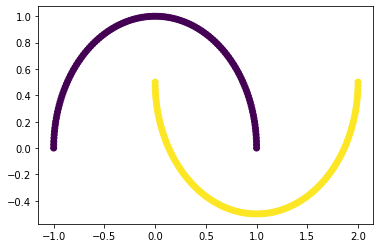

In [6]:
import matplotlib.pyplot as plt
plt.scatter(features.T[0,:],features.T[1,:],c=labels)

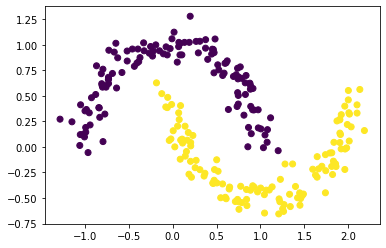

In [7]:
features, labels= make_moons(n_samples=250, noise=0.1)
plt.scatter(features.T[0,:],features.T[1,:],c=labels)

# Normalize Data

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)
#alternatively you can just use fit transform
#scaled_features = scaler.fit_transform(features)

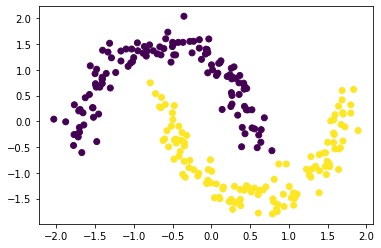

In [9]:
plt.scatter(scaled_features.T[0,:],scaled_features.T[1,:],c=labels)

## Split Data

In [10]:
from sklearn.model_selection import train_test_split
X_training, X_testing, Y_training, Y_testing = train_test_split(scaled_features, labels, test_size=0.3)

Text(0.5, 1.0, 'Test Data')

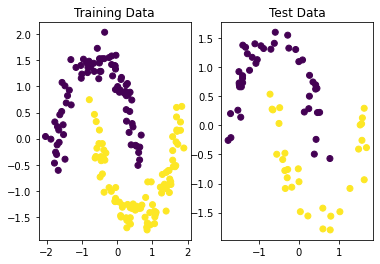

In [11]:
plt.subplot(1,2,1)
plt.scatter(X_training.T[0,:],X_training.T[1,:],c=Y_training)
plt.title("Training Data")
plt.subplot(1,2,2)
plt.scatter(X_testing.T[0,:],X_testing.T[1,:],c=Y_testing)
plt.title("Test Data")


# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_training,Y_training)
LGR_Predicted=model.predict(X_testing)

Text(0.5, 1.0, 'True Labels - Test Data')

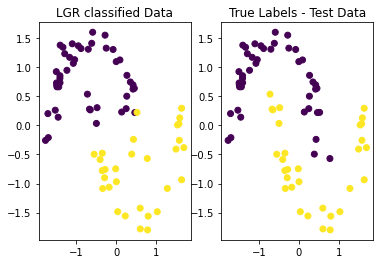

In [13]:
plt.subplot(1,2,1)
plt.scatter(X_testing.T[0,:],X_testing.T[1,:],c=LGR_Predicted)
plt.title("LGR classified Data")
plt.subplot(1,2,2)
plt.scatter(X_testing.T[0,:],X_testing.T[1,:],c=Y_testing)
plt.title("True Labels - Test Data")

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print('LGC result:')
print('Accuracy: ',accuracy_score(Y_testing,LGR_Predicted))
print('f1_score: ',f1_score(Y_testing,LGR_Predicted))
print('Precision: ', precision_score(Y_testing,LGR_Predicted))
print('Recall: ', recall_score(Y_testing,LGR_Predicted))

LGC result:
Accuracy:  0.88
f1_score:  0.8524590163934426
Precision:  0.8666666666666667
Recall:  0.8387096774193549


# Classification using Neural Networks

Further Reading:
https://scikit-learn.org/stable/modules/neural_networks_supervised.html

Model Parameters:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

## No hidden Layer

In [15]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=(),max_iter=1000)
MLP.fit(X_training, Y_training)

MLPClassifier(activation='logistic', hidden_layer_sizes=(), max_iter=1000,
              solver='sgd')

In [16]:
MLP.coefs_

[array([[ 0.72244956],
        [-1.36652433]])]

In [17]:
MLP.intercepts_

[array([0.06027412])]

In [18]:
MLP_Predicted=MLP.predict(X_testing)

Text(0.5, 1.0, 'True Label - Test Data')

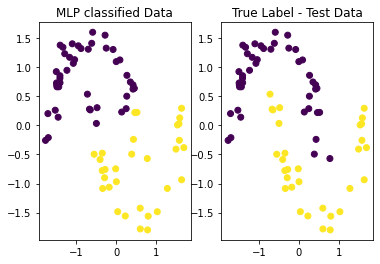

In [19]:
plt.subplot(1,2,1)
plt.scatter(X_testing.T[0,:],X_testing.T[1,:],c=MLP_Predicted)
plt.title("MLP classified Data")
plt.subplot(1,2,2)
plt.scatter(X_testing.T[0,:],X_testing.T[1,:],c=Y_testing)
plt.title("True Label - Test Data")

## Let's add hidden layer

In [20]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(activation='logistic',solver='lbfgs',hidden_layer_sizes=(5,),max_iter=5000)
#Solver=lbfgs
MLP.fit(X_training, Y_training)

MLPClassifier(activation='logistic', hidden_layer_sizes=(5,), max_iter=5000,
              solver='lbfgs')

In [21]:
MLP.n_iter_

78

In [22]:
MLP.coefs_

[array([[ -3.56195637, -14.41457065,   5.22251432,   0.8997355 ,
          -1.47975004],
        [  2.47301811,  -9.14995124,  -0.36915844,   1.51338221,
           6.9638457 ]]), array([[-29.95610131],
        [ 22.03398863],
        [ 18.62324764],
        [ 13.65567531],
        [-21.27224773]])]

In [23]:
MLP.intercepts_

[array([ 4.66395119, -0.58238358,  5.80298471, -2.14093795, -9.74527205]),
 array([-2.35938456])]

In [24]:
MLP_Predicted=MLP.predict(X_testing)

Text(0.5, 1.0, 'True Labels- Test Data')

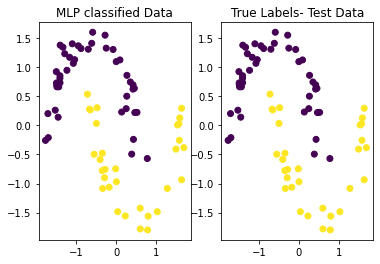

In [25]:
plt.subplot(1,2,1)
plt.scatter(X_testing.T[0,:],X_testing.T[1,:],c=MLP_Predicted)
plt.title("MLP classified Data")
plt.subplot(1,2,2)
plt.scatter(X_testing.T[0,:],X_testing.T[1,:],c=Y_testing)
plt.title("True Labels- Test Data")

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print('MLP result:')
print('Accuracy: ',accuracy_score(Y_testing,MLP_Predicted))
print('f1_score: ',f1_score(Y_testing,MLP_Predicted))
print('Precision: ', precision_score(Y_testing,MLP_Predicted))
print('Recall: ', recall_score(Y_testing,MLP_Predicted))

MLP result:
Accuracy:  1.0
f1_score:  1.0
Precision:  1.0
Recall:  1.0


# K-Nearest Neighbours

In [27]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_training, Y_training)
KNN_Predicted=KNN.predict(X_testing)

Text(0.5, 1.0, 'Test Data')

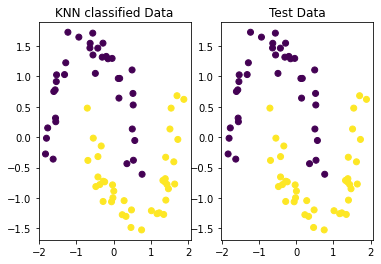

In [ ]:
plt.subplot(1,2,1)
plt.scatter(X_testing.T[0,:],X_testing.T[1,:],c=KNN_Predicted)
plt.title("KNN classified Data")
plt.subplot(1,2,2)
plt.scatter(X_testing.T[0,:],X_testing.T[1,:],c=Y_testing)
plt.title("Test Data")

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print('KNN result:')
print('Accuracy: ',accuracy_score(Y_testing,KNN_Predicted))
print('f1_score: ',f1_score(Y_testing,KNN_Predicted))
print('Precision: ', precision_score(Y_testing,KNN_Predicted))
print('Recall: ', recall_score(Y_testing,KNN_Predicted))

KNN result:
Accuracy:  1.0
f1_score:  1.0
Precision:  1.0
Recall:  1.0
